   Language  Usage
0        JS  64.6%
1       SQL  54.1%
2  HTML/CSS  52.9%
3        PY  46.9%
4        TS  43.4%

Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -0.91
- El intercepto del modelo es: 33.57

Interpretación del comportamiento:
- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de los lenguajes de programación.
- El coeficiente de la pendiente (-0.91) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.
- El intercepto (33.57) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.

Análisis más detallado:
- El lenguaje de programación con mayor porcentaje es JS (64.6%), mientras que el de menor porcentaje es Nim (0.2%).
- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking, lo que es común en list

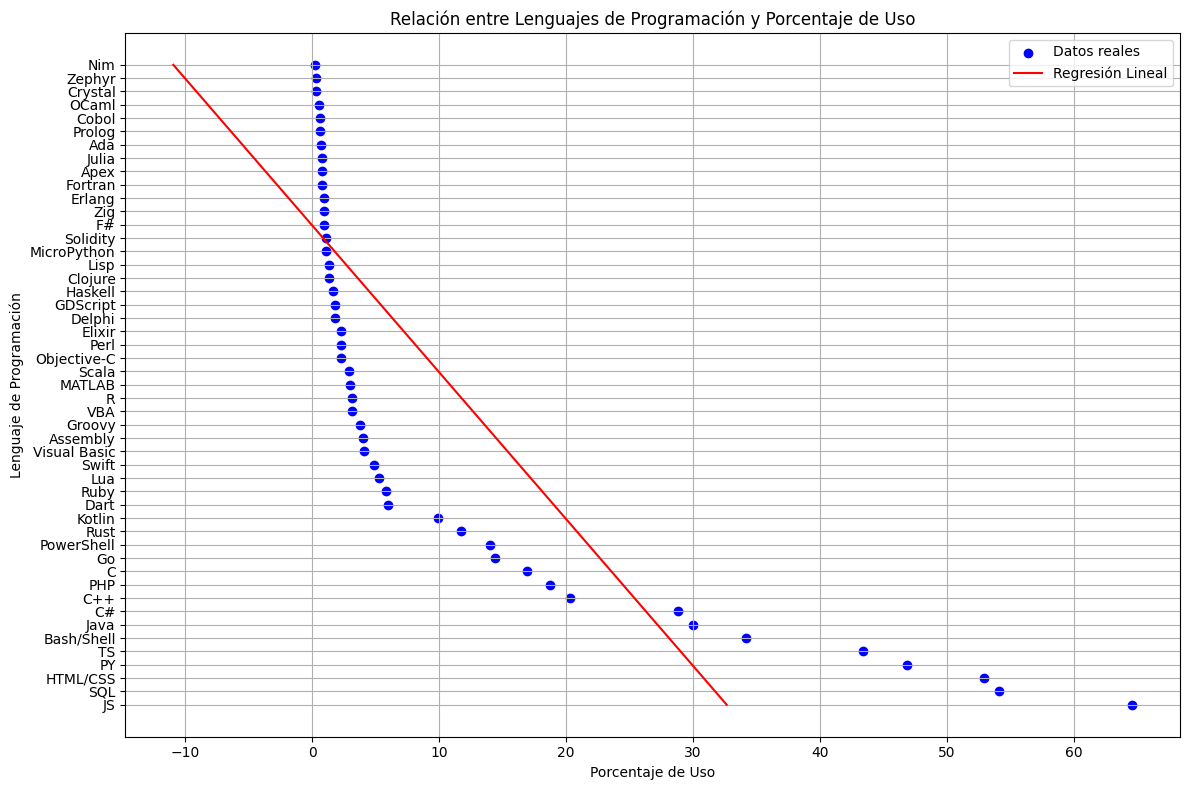

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV
archivo_csv = "lenguajes_scripting.csv"  # Asegúrate de que el archivo esté en el directorio adecuado
df = pd.read_csv(archivo_csv)

# Verificar que los datos fueron cargados correctamente
print(df.head())  # Esto imprime las primeras filas del dataframe para verificar la carga

# Convertir la columna 'Usage' a valores numéricos eliminando el símbolo de porcentaje
df['Usage'] = df['Usage'].str.rstrip('%').astype(float)

# Ordenar por porcentaje y resetear el índice
df = df.sort_values(by="Usage", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values
y = df["Usage"].values

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print(f"- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de los lenguajes de programación.")
print(f"- El coeficiente de la pendiente ({pendiente:.2f}) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.")
print(f"- El intercepto ({intercepto:.2f}) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.")
print("\nAnálisis más detallado:")
top_lenguaje = df.iloc[0]["Language"]
top_porcentaje = df.iloc[0]["Usage"]
bottom_lenguaje = df.iloc[-1]["Language"]
bottom_porcentaje = df.iloc[-1]["Usage"]

print(f"- El lenguaje de programación con mayor porcentaje es {top_lenguaje} ({top_porcentaje}%), mientras que el de menor porcentaje es {bottom_lenguaje} ({bottom_porcentaje}%).")
print(f"- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking, lo que es común en listas de popularidad de lenguajes de programación.")
print(f"- El análisis sugiere que existe una correlación negativa entre el ranking y el porcentaje de uso.")

# Configurar el gráfico con los nombres de los lenguajes en el eje y
plt.figure(figsize=(12, 8))
plt.scatter(df["Usage"], df["Language"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Language"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Porcentaje de Uso")
plt.ylabel("Lenguaje de Programación")
plt.title("Relación entre Lenguajes de Programación y Porcentaje de Uso")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()